<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Numerično odvajanje</b></font>
<br><br>
<font size="4">
[izr. prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>

<font size="2">Julij 2017 </font>

</center>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Uvod" data-toc-modified-id="Uvod-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod</a></div><div class="lev1 toc-item"><a href="#Aproksimacija-prvega-odvoda-po-metodi-končnih-razlik" data-toc-modified-id="Aproksimacija-prvega-odvoda-po-metodi-končnih-razlik-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Aproksimacija prvega odvoda po metodi končnih razlik</a></div><div class="lev1 toc-item"><a href="#Centralna-diferenčna-shema" data-toc-modified-id="Centralna-diferenčna-shema-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Centralna diferenčna shema</a></div><div class="lev2 toc-item"><a href="#Odvod-f'(x)" data-toc-modified-id="Odvod-f'(x)-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Odvod $f'(x)$</a></div><div class="lev2 toc-item"><a href="#Primer:-exp(-x)" data-toc-modified-id="Primer:-exp(-x)-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Primer: $\exp(-x)$</a></div><div class="lev2 toc-item"><a href="#Odvod-f''(x)" data-toc-modified-id="Odvod-f''(x)-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Odvod $f''(x)$</a></div><div class="lev2 toc-item"><a href="#Odvod-f'''(x)" data-toc-modified-id="Odvod-f'''(x)-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Odvod $f'''(x)$</a></div><div class="lev2 toc-item"><a href="#Odvod-f^{(4)}(x)" data-toc-modified-id="Odvod-f^{(4)}(x)-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Odvod $f^{(4)}(x)$</a></div><div class="lev2 toc-item"><a href="#Povzetek-centralne-diferenčne-sheme" data-toc-modified-id="Povzetek-centralne-diferenčne-sheme-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Povzetek centralne diferenčne sheme</a></div><div class="lev2 toc-item"><a href="#Uporaba-scipy.misc.central_diff_weight" data-toc-modified-id="Uporaba-scipy.misc.central_diff_weight-37"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Uporaba <code>scipy.misc.central_diff_weight</code></a></div><div class="lev2 toc-item"><a href="#Boljši-približek---Richardsova-ekstrapolacija" data-toc-modified-id="Boljši-približek---Richardsova-ekstrapolacija-38"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Boljši približek - Richardsova ekstrapolacija</a></div><div class="lev1 toc-item"><a href="#Necentralna-diferenčna-shema" data-toc-modified-id="Necentralna-diferenčna-shema-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Necentralna diferenčna shema</a></div><div class="lev2 toc-item"><a href="#Diferenčna-shema-naprej" data-toc-modified-id="Diferenčna-shema-naprej-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Diferenčna shema naprej</a></div><div class="lev2 toc-item"><a href="#Diferenčna-shema-nazaj" data-toc-modified-id="Diferenčna-shema-nazaj-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Diferenčna shema nazaj</a></div><div class="lev1 toc-item"><a href="#Uporaba-numpy.gradient" data-toc-modified-id="Uporaba-numpy.gradient-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Uporaba <code>numpy.gradient</code></a></div><div class="lev1 toc-item"><a href="#Zaokrožitvena-napaka-pri-numeričnem-odvajanju" data-toc-modified-id="Zaokrožitvena-napaka-pri-numeričnem-odvajanju-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Zaokrožitvena napaka pri numeričnem odvajanju</a></div><div class="lev2 toc-item"><a href="#Preprost-primer" data-toc-modified-id="Preprost-primer-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Preprost primer</a></div><div class="lev1 toc-item"><a href="#Nekaj-vprašanj-za-razmislek!" data-toc-modified-id="Nekaj-vprašanj-za-razmislek!-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev1 toc-item"><a href="#Dodatno" data-toc-modified-id="Dodatno-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dodatno</a></div>

# Uvod

Vsako elementarno funkcijo lahko analitično odvajamo; definicija odvoda je:
$$f'(x)=\lim_{\Delta x \rightarrow 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}.$$

V okviru tega poglavja se bomo seznanili s tem, kako numerično izračunamo odvod funkcije $f(x)$; pri tem so vrednosti funkcije $f(x)$ podane tabelarično kakor je prikazano na sliki:
<img src='./fig/odvajanje_tabela.png' width=400>
Najprej se bomo osredotočili na ekvidistantno, s korakom $h$, razporejene vrednoti $x_i$; vrednostni funkcije bodo pa $y_i=f(x_i)$.

Pri numeričnem odvajanju imamo dva, v principu različna, pristopa:
1. najprej izvedemo **interpolacijo/aproksimacijo**, nato pa na podlagi znanih interpolacijskih/aproksimacijskih funkcij izračunamo odvod (o tej temi smo že govorili pri interpolaciji oz. aproksimaciji) in 
* računanje odvoda **neposredno iz vrednosti iz tabele**.

Slednji pristop temelji na razliki dveh približno enakih funkcijskih vrednosti, ki jih delimo z majhno vrednostjo: odvod ima posledično bistveno manj significantnih števk kakor pa funkcijske vrednosti v tabeli. Numeričnemu odvajanju se izognemo, če imamo to možnost; je pa v nekaterih primerih (npr. reševanje diferencialnih enačb) nepogrešljivo orodje!

# Aproksimacija prvega odvoda po metodi končnih razlik

Odvod $f'(x)$ lahko aproksimiramo na podlagi razvoja Taylorje vrste. To metodo imenujemo **metoda končnih razlik** ali tudi **diferenčna metoda**.

Razvijmo **Taylorjevo vrsto naprej** (naprej, zaradi člena $+h$):
$$f{\left (x + h \right )} =\sum_{n=0}^{\infty}h^n\frac{d^n}{dx^n}f(x)= f{\left (x \right )} + h\, f'\left (x \right ) + \underbrace{h^2\,f''(x)+\cdots}_{\mathcal{O}\left(h^{2}\right)}$$


Člen $\mathcal{O}\left(h^{2}\right)$ označuje napako drugega reda. Če iz enačbe izpostavimo prvi odvod:

$$f'(x)=f'{\left (x \right )}=\frac{1}{h}\left(f{\left (x + h \right )} - f{\left (x \right )}\right) + \underbrace{h\,f''(x)+\cdots}_{\mathcal{O}\left(h^{1}\right)}$$

Ugotovimo, da lahko ocenimo prvi odvod v točki $x_i$ (to je: $f_o'(x_i)$) na podlagi dveh zaporednih funkcijskih vrednosti:
$$f_o'(x_i)=\frac{1}{h}\left(y_{i+1}-y_i\right)$$
in pri tem naredimo **napako metode**, ki je prvega reda $\mathcal{O}\left(h^{1}\right)$. 

Opomba: $y_i=f(x_i)$ (glejte sliko zgoraj).

Velikost te napake pa lahko ocenimo:
$$e=h\,f''(\xi),$$
kjer je $\xi$ neznana vrednost na intervalu $[x_i, x_{i+1}]$ in smo zanemarili višje člene.

Velja torej izraz:
$$f'(x_i)=f_o'(x_i)+e$$

Sedaj si poglejmo kako pridemo do istega rezultata s strojno izpeljavo; najprej uvozimo ``sympy``:

In [4]:
import sympy as sym
sym.init_printing()

In definirajmo simbole:

In [5]:
f, x, h = sym.symbols('f, x, h')

Nato nadaljujemo z razvojem **Taylorjeve vrste naprej** (angl. *forward Taylor series*):

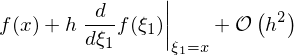

In [6]:
f(x+h).series(h, n=2)

Člen $\mathcal{O}\left(h^{2}\right)$ vsebuje člene drugega in višjega reda. V zgornji enačbi je uporabljena začasna spremenljivko za odvajanje $\xi_1$; izvedmo odvajanje in vstavimo $\xi_1=x$:

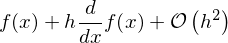

In [7]:
f(x+h).series(h, n=2).doit()

Zapišemo enačbo:

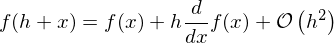

In [8]:
enačba = sym.Eq(f(x+h), f(x+h).series(h, n=2).doit())
enačba

In jo rešimo za prvi odvod $f'(x)$:

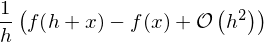

In [9]:
f1_naprej_točno = sym.solve(enačba, f(x).diff(x))[0]
f1_naprej_točno

V kolikor odvod drugega in višjih redov ne upoštevamo, smo naredili torej napako:

In [10]:
f1_naprej_O = f1_naprej_točno.expand().getO()
f1_naprej_O

Napaka $\mathcal{O}\left(h^{1}\right)$ je torej prvega reda in če ta člen zanemarimo naredimo *napako metode* in dobimo oceno odvoda:

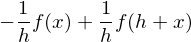

In [11]:
f1_naprej_ocena = f1_naprej_točno.expand().removeO()
f1_naprej_ocena

Ugotovimo, da gre za isti izraz, kakor smo ga izpeljali zgoraj.

# Centralna diferenčna shema

## Odvod $f'(x)$

Najprej si poglejmo razvojem **Taylorjeve vrste nazaj** (angl. *backward Taylor series*):

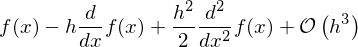

In [12]:
f(x-h).series(h, n=3).doit()

Ugotovimo, da pri se pri razliki vrste naprej in nazaj odštevajo členi sodega reda; definirajmo:

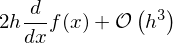

In [13]:
def razlika(n=3):
    return f(x+h).series(h, n=n).doit()-f(x-h).series(h, n=n).doit()
razlika(n=3)

Izvedemo sledeče korake:
1. Taylorjevo vrsto nazaj odštejemo od vrste naprej, se sodi odvodi odštejejo,
* nato rešimo enačbo za prvi odvod,
* določimo metodično napako,
* določimo oceno odvoda.

Izvedimo zgornje korake:

In [14]:
f1_cent_točno = sym.solve(
           sym.Eq(f(x+h) - f(x-h), razlika(n=3)), # 1 korak
           f(x).diff(x))[0]                       # 2.korak
f1_cent_O = f1_cent_točno.expand().getO()         # 3.korak
f1_cent_ocena = f1_cent_točno.expand().removeO()  # 4.korak

Ocena 1. odvoda torej je:

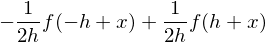

In [15]:
f1_cent_ocena

Metodična napaka pa je torej drugega reda:

In [16]:
f1_cent_O

## Primer: $\exp(-x)$

Poglejmo si primer eksponentne funkcije $f(x)=\exp(-x)$ in za točko $x=1.0$ izračunajmo prvi odvod $f'(x)=-\exp(-x)$ pri koraku $h_0=1$ in $h_1=0.1$. 

Najprej pripravimo tabelo numeričnih vrednosti in točen rezultat:

In [17]:
import numpy as np
x0 = np.array([0., 1., 2.]) # korak h=1
y0 = np.exp(-x0)
h0 = x0[1]-x0[0]

x1 = np.array([0.9, 1.0, 1.1]) # korak h=0.1
y1 = np.exp(-x1)
h1 = x1[1]-x1[0]

f1_točno0 = - np.exp(-1) # točen rezultat
f1_točno1 = - np.exp(-1) # točen rezultat

Potem uporabimo shemo naprej:

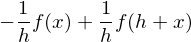

In [18]:
f1_naprej_ocena # da se spomnimo

In [19]:
f1_naprej0 = (y0[1:]-y0[:-1])/h0   # korak h_0
f1_naprej1 = (y1[1:]-y1[:-1])/h1   # korak h_1

In analizirajmo napako pri $x$=1.0:

In [20]:
f1_točno0 - f1_naprej0[1]

In [21]:
f1_točno1 - f1_naprej1[1] # korak h1

Potrdimo lahko, da je napaka pri koraku $h/10$ res približno 1/10 tiste pri koraku $h$.

Pogljemo sedaj še napako za centralno diferenčno shemo, ki je drugega reda:

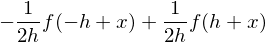

In [22]:
f1_cent_ocena

In [23]:
f1_cent0 = (y0[2:]-y0[:-2])/(2*h0) # korak h_0
f1_cent1 = (y1[2:]-y1[:-2])/(2*h1) # korak h_1

In analizirajmo napako:

In [24]:
f1_točno0 - f1_cent0[0] # korak h0

In [25]:
f1_točno1 - f1_cent1[0] # korak h1

Potrdimo lahko, da je napaka pri koraku $h/10$ res približno 1/100 tiste pri koraku $h$ (torej kvadratna konvergenca).

## Odvod $f''(x)$

Če Taylorjevo vrsto naprej in nazaj seštejemo, se odštejejo lihi odvodi:

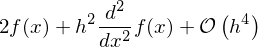

In [26]:
def vsota(n=3):
    return f(x+h).series(h, n=n).doit() + f(x-h).series(h, n=n).doit()
vsota(n=4)

Določimo drugi odvod:

In [27]:
f2_cent_točno = sym.solve(
           sym.Eq(f(x+h) + f(x-h), vsota(n=4)),   # 1 korak
           f(x).diff(x,2))[0]                     # 2.korak
f2_cent_O = f2_cent_točno.expand().getO()         # 3.korak
f2_cent_ocena = f2_cent_točno.expand().removeO()  # 4.korak

Ocena 2. odvoda je:

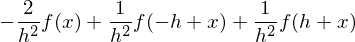

In [28]:
f2_cent_ocena

Metodična napaka pa je ponovno drugega reda:

In [29]:
f2_cent_O

## Odvod $f'''(x)$

Če želimo določiti tretji odvod, moramo Taylorjevo vrsto razviti do stopnje 5:

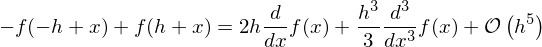

In [30]:
eq_h = sym.Eq(f(x+h)-f(x-h), razlika(n=5))
eq_h

Uporaba 1. odvoda, ki smo ga izpeljali zgoraj nam ne bi koristila, saj je red napake $\mathcal{O}\left(h^{2}\right)$ kar pomeni, da bi v zgornji pri deljenju z $h^3$ dobili $\mathcal{O}\left(h^{-1}\right)$.

Uporabimo trik: ponovimo razvoj, vendar na podlagi dodatnih točk, ki sta od $x$ oddaljena za $2h$ in $-2h$:

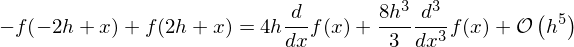

In [31]:
eq_2h = eq_h.subs(h, 2*h)
eq_2h

Sedaj imamo dve enačbi in dve neznanki; sistem bomo rešili po korakih:

1. iz enačbo `eq_h` rešimo za prvi odvod,
* iz enačbo `eq_2h` rešimo za prvi odvod,
* enačimo rezultata prvih dveh korakov in rešimo za tretji odvod,
* določimo metodično napako,
* določimo oceno odvoda.

Izvedimo naveden korake:

In [32]:
f3_cent_točno = sym.solve(
        sym.Eq(sym.solve(eq_h, f(x).diff(x))[0],  # 1. korak
        sym.solve(eq_2h, f(x).diff(x))[0]),       # 2. korak
        f(x).diff(x,3))[0]                        # 3. korak
f3_cent_O = f3_cent_točno.expand().getO()         # 4.korak
f3_cent_ocena = f3_cent_točno.expand().removeO()  # 5.korak

Ocena 3. odvoda je:

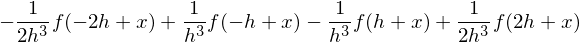

In [33]:
f3_cent_ocena

Potrdimo, da je metodična napaka drugega reda:

In [34]:
f3_cent_O

## Odvod $f^{(4)}(x)$

Ponovimo podoben postopek kot za 3. odvod, vendar za 4. odvod seštevamo Taylorjevo vrsto (do stopnje 6) naprej in nazaj:

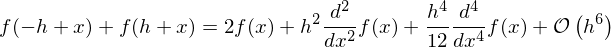

In [35]:
eq_h = sym.Eq(f(x+h)+f(x-h), vsota(n=6))
eq_h

Pripravimo dodatno enačbo na podlagi točk, ki sta od $x$ oddaljeni za $2h$ in $-2h$:

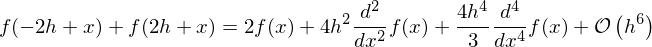

In [36]:
eq_2h = eq_h.subs(h, 2*h)
eq_2h

In iz dveh enačb določimo 4. odvod:

In [37]:
f4_cent_točno = sym.solve(
        sym.Eq(sym.solve(eq_h, f(x).diff(x,2))[0],  # 1. korak
        sym.solve(eq_2h, f(x).diff(x,2))[0]),       # 2. korak
        f(x).diff(x,4))[0]                          # 3. korak
f4_cent_O = f4_cent_točno.expand().getO()           # 4.korak
f4_cent_ocena = f4_cent_točno.expand().removeO()    # 5.korak

Ocena 4. odvoda je:

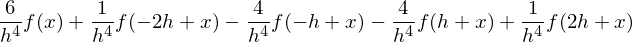

In [38]:
f4_cent_ocena

Potrdimo, da je metodična napaka drugega reda:

In [39]:
f4_cent_O

## Povzetek centralne diferenčne sheme

Zgoraj smo izpeljali prve štiri odvode na napako metode 2. reda. Bistvo zgornjih izpeljav je, da nam dajo uteži s katerimi moramo množiti funkcijske vrednosti, da izračunamo določeni odvod. Iz tega razloga bomo tukaj te uteži zbrali.

Najprej zberimo vse ocene odvodov v seznam:

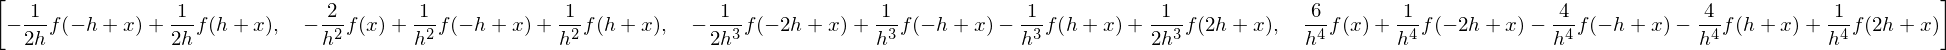

In [40]:
odvodi = [f1_cent_ocena, f2_cent_ocena, f3_cent_ocena, f4_cent_ocena]
odvodi

Na razpolago imamo 5 funkcijskih vrednosti (pri legi: $x-2h, x-h, x, s+h, s+2h$), ki jih damo v seznam:

In [41]:
funkcijske_vrednosti = [f(x-2*h), f(x-h), f(x), f(x+h), f(x+2*h)]

Utež prvega odvoda za funkcijsko vrednosti $f(x-h)$ izračunamo:

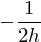

In [42]:
f1_cent_ocena.expand().coeff(funkcijske_vrednosti[1])

Sedaj posplošimo in izračunajmo uteži za vse funkcijske vrednosti in za vse ocene odvodov:

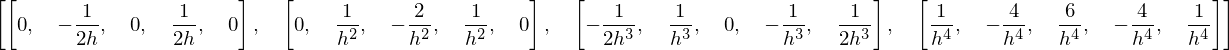

In [43]:
centralna_diff_shema = [[odvod.expand().coeff(fv) for fv in funkcijske_vrednosti] \
                        for odvod in odvodi]
centralna_diff_shema

Zgornje povzetke lahko tudi zapišemo v tabelarični obliki:

|       |$\mbox{$f(x-2h)$}$|$\mbox{$f(x-h)$}$ |$\mbox{$\quad f(x)\quad$}$   |$\mbox{$f(x+h)$}$ |$\mbox{$f(x+2h)$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{h}\cdot$}$| 0     | -0.5 | 0 | 0.5 | 0|
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 0 | 1 | -2 | 1 | 0|
|$\mbox{$f'''(x)=\frac{1}{h^3}\cdot$}$| -0.5 | 1 | 0 | -1 | 0.5|
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| 1 | -4 | 6 | -4 | 1|

Prikazana centralna diferenčna shema ima napako 2. reda $\mathcal{O}(h^{2})$.

## Uporaba ``scipy.misc.central_diff_weight``

Uteži za centralno diferenčno metodo lahko izračunamo tudi z uporabo ``scipy.misc.central_diff_weight``:

``central_diff_weights(Np, ndiv=1)``

`Np` predstavlja število točk čez katere želimo izračunati odvod, `ndiv` pa stopnjo odvoda (privzeto 1).
Za več infrmacij glejte [dokumentacijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.central_diff_weights.html).

Uvozimo funkcijo:

In [44]:
from scipy.misc import central_diff_weights

3$.$ odvod (čez tri točke) napake reda  $\mathcal{O}(h^{2})$:

In [45]:
central_diff_weights(Np=5, ndiv=3)

array([ -5.00000000e-01,   1.00000000e+00,   4.16333634e-17,
        -1.00000000e+00,   5.00000000e-01])

Opomba: ``SymPy.finite_diff_weights`` omogoča izračun uteži tudi pri nekonstantnem koraku; v podrobnosti tukaj ne bomo šli in radovednega bralca napotimo na [dokumentacijo](http://docs.sympy.org/latest/modules/calculus/index.html#sympy.calculus.finite_diff.finite_diff_weights)).

## Boljši približek - Richardsova ekstrapolacija

Če je točen odvod definiran kot:
$$f(x_i)=f_o'(x_i)+e,$$
kjer je $f_o'(x_i)$ numerična ocena odvoda v točki $x_i$ in $e$ ocena napake.

Za metodo reda točnosti $n$: $\mathcal{O}(h^{n})$ pri koraku $h$ velja:
$$f(x_i)=f_o'(x_i, h)+K\,h^n,$$
kjer je $K$ neznana konstanta. 

Če korak razpolovimo in predostavimo, da se $K$ ne spremeni, velja:
$$f(x_i)=f_o'\left(x_i, \frac{h}{2}\right)+K\,\left(\frac{h}{2}\right)^n,$$

Iz obeh enačb izločimo konstanto $K$ in določimo izboljšan približek:
$$\overline{f}(x_i)=\frac{2^n\,f_o'\left(x_i, \frac{h}{2}\right)-f_o'(x_i, h)}{2^n-1}$$

Poglejmo si preprosti primer $f(x)=\sin(x)$ (analitični odvod je: $f'(x)=\cos(x)$):

In [46]:
x = np.linspace(0, 2*np.pi, 9)
y = np.sin(x)

Pri koraku $h$ je imamo funkcijske prednosti definirane pri:

In [47]:
x

array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714,  6.28318531])

In pri koraku $2h$:

In [48]:
x[::2]

array([ 0.        ,  1.57079633,  3.14159265,  4.71238898,  6.28318531])

Izračunajmo z `numpy.gradient` odvod s korakom $h$ in $2h$:

In [49]:
f_ocena_h = np.gradient(y, x[1], edge_order=2)
f_ocena_h

array([  1.16401286e+00,   6.36619772e-01,   0.00000000e+00,
        -6.36619772e-01,  -9.00316316e-01,  -6.36619772e-01,
        -1.41357986e-16,   6.36619772e-01,   1.16401286e+00])

In [50]:
f_ocena_2h = np.gradient(y[::2], x[2], edge_order=2)
f_ocena_2h

array([  1.27323954e+00,   3.89817183e-17,  -6.36619772e-01,
        -1.16945155e-16,   1.27323954e+00])

Pri $x=\pi$ je numerični odvod s korakom $h$ oz. $2h$ (opazimo relativno veliko napako metode):

In [51]:
f_ocena_h[4]

In [52]:
f_ocena_2h[2]

Izračunajmo izboljšano oceno za $x=\pi$:

In [53]:
f_ocena_izboljšana = (2**2 * f_ocena_h[4] - f_ocena_2h[2])/(2**2-1)
f_ocena_izboljšana

Vidimo, da je izboljšana ocena najbližje teoretični vrednosti $\cos(\pi)=-1$.

# Necentralna diferenčna shema

Centralna diferenčna shema, ki smo jo spoznali zgoraj, je zelo uporabna in relativno natančna; ker pa je ne moremo vedno uporabiti (recimo na začetku ali koncu tabele), si moramo pomagati z **necentralnimi diferenčnimi shemami** za računanje odvodov.

Poznamo:
* **diferenčno shemo naprej**, ki odvod točke aproksimira z vrednostmi funkcije naslednjih  točkah in 
* **diferenčno shemo nazaj**, ki odvod točke aproksimira z vrednostmi v predhodnih točkah.

Izpeljave so podobne kakor smo prikazali za centralno diferenčno shemo, zato ji tukaj ne bomo obravnavali in bomo prikazali samo končni rezultat.

## Diferenčna shema naprej

Diferenčna shema naprej z redom napake $\mathcal{O}(h^{1})$:

|       |$\mbox{$\quad f(x)\quad$}$|$\mbox{$f(x+h)$}$ |$\mbox{$f(x+2h)$}$   |$\mbox{$f(x+3h)$}$ |$\mbox{$f(x+4h)$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{h}\cdot$}$| -1     | 1 | 0 | 0 | 0|
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 1 | -2 | 1 | 0 | 0|
|$\mbox{$f'''(x)=\frac{1}{h^3}\cdot$}$| -1 | 3 | -3| 1 | 0|
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| 1 | -4 | 6 | -4 | 1|

Diferenčna shema naprej z redom napake $\mathcal{O}(h^{2})$:

|       |$\mbox{$\quad f(x)\quad$}$|$\mbox{$f(x+h)$}$ |$\mbox{$f(x+2h)$}$   |$\mbox{$f(x+3h)$}$ |$\mbox{$f(x+4h)$}$|$\mbox{$f(x+5h)$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{2h}\cdot$}$| -3 | 4 | -1| 0 | 0|  0| 
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 2 | -5 | 4 | -1| 0| 0| 
|$\mbox{$f'''(x)=\frac{1}{2h^3}\cdot$}$| -5 | 18| -24| 14| -3| 0| 
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| 3 | -14 | 26 | -24 | 11| -2| 

## Diferenčna shema nazaj

Diferenčna shema nazaj z redom napake $\mathcal{O}(h^{1})$:

|       |$\mbox{$f(x-4h)$}$|$\mbox{$f(x-3h)$}$ |$\mbox{$f(x-2h)$}$   |$\mbox{$f(x-h)$}$ |$\mbox{$\quad f(x)\quad$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{h}\cdot$}$| 0 | 0| 0 | -1| 1|
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 0 | 0 | 1 | -2| 1|
|$\mbox{$f'''(x)=\frac{1}{h^3}\cdot$}$| 0 | -1| 3| -3| 1|
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| 1 | -4 | 6 | -4 | 1|

Diferenčna shema nazaj z redom napake $\mathcal{O}(h^{2})$:

|       |$\mbox{$f(x-5h)$}$|$\mbox{$f(x-4h)$}$ |$\mbox{$f(x-3h)$}$   |$\mbox{$f(x-2h)$}$ |$\mbox{$f(x-h)$}$|$\mbox{$\quad f(x)\quad$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{2h}\cdot$}$| 0 | 0| 0| 1 |-4| 3| 
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 0 | 0 | -1| 4|-5| 2| 
|$\mbox{$f'''(x)=\frac{1}{2h^3}\cdot$}$| 0 | 3| -14| 24|-18| 5| 
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| -2| 11| -24| 26 | -14| 3| 

# Uporaba ``numpy.gradient``

Za izračun numeričnih odvodov (centralna diferenčna shema 2. reda) lahko uporabimo tudi ``numpy.gradient``:

``gradient(f, *varargs, **kwargs)``

kjer je `f` predstavlja tabelo vrednosti (v obliki numeričnega polja) funkcije katere odvod iščemo. `f` je lahko ene ali več dimenzij. Pozicijski parameter `varargs` definirajo razdaljo med vrednostmi `f`; privzeto je vrednost 1; ta vrednost je lahko skalar, lahko pa tudi seznam vrednosti neodvisne spremenljivke ()ali tudi kombinacija obojega). Gradientna metoda na robovih uporabi shemo naprej oziroma nazaj; parameter `edge_order` definira katera red sheme (možnost je izbrati 1. ali 2.), ki se uporabi (privzeto 1). 

Rezultat funkcije `gradient` je numerični seznam (ali seznam numeričnih seznamov) z izračunanimi odvodi.

Za podrobnosti glejte dokumentacijo: [docs.scipy.org](http://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html).

Uporabo si bomo pogledali na primeru polinoma $p(x)=x$:

In [54]:
p = np.poly1d([1,0])
print(p)

 
1 x


Pripravimo tabelo vrednosti:

In [56]:
x = np.array([0, 0.5, 1., 1.5, 2.])
y = p(x)
y

array([ 0. ,  0.5,  1. ,  1.5,  2. ])

Prikažimo podatke

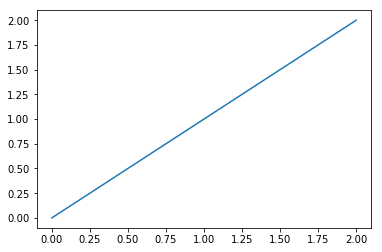

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y);

Očitno je, da je odvod take funkcije enak 1. 

Poglejmo kako ga izračunamo numerično:

In [58]:
np.gradient(y, 0.5)

array([ 1.,  1.,  1.,  1.,  1.])

Lahko bi podali tudi seznam vrednosti $x$:

In [59]:
np.gradient(y, x)

array([ 1.,  1.,  1.,  1.,  1.])

Ne smemo pa pozabiti, da je privzeti koraj enako $\Delta x=1$ in nam takšen klic:

In [60]:
np.gradient(y)

array([ 0.5,  0.5,  0.5,  0.5,  0.5])

Vrne seveda napačni rezultat, daj nismo podali pravega koraka $\Delta x$.

# Zaokrožitvena napaka pri numeričnem odvajanju

Zgoraj smo se osredotočili na napako metode. Pri numeričnem odvajanju pa moramo biti zelo pozorni tudi na **zaokrožiteno** (ali tudi *upodobitveno*) napako! 

Pri tem moramo paziti na *osnovno zaokrožitveno napako* $\epsilon$. Prvič, korak $h$ je lahko majhen glede na osnovno zaokrožitveno napako in drugič, razlika med vrednostjo funkcije $f(x)$ in $f(x+h)$ je lahko majhna glede na *osnovno zaokrožitveno napako* $\epsilon$.

Spodaj si bomo pogledali primer, kjer bomo natančnost spreminjali v treh korakih:
1. ``float16`` -
    16-bitni zapis: predznak 1 bit, 5 bitov eksponent, 10 bitov mantisa
* ``float32`` -
    32-bitni zapis: predznak 1 bit, 8 bitov eksponent, 23 bitov mantisa
* ``float64`` -
    64-bitni zapis: predznak 1 bit, 11 bitov eksponent, 52 bitov mantisa (to je privzeta natančnost).

Za več o tipih v ``numpy`` glejte [dokumentacijo](http://docs.scipy.org/doc/numpy/user/basics.types.html)

Določimo sedaj osnovno zaokrožitveno napako za posamezni tip:

In [61]:
eps16 = np.finfo(np.float16).eps
eps32 = np.finfo(np.float32).eps
eps64 = np.finfo(np.float64).eps
print(f'Osnovna zaokrožitvena napaka za tipe \
`float16`, `float32` in `float64` je:\n{[eps16, eps32, eps64]}')

Osnovna zaokrožitvena napaka za tipe `float16`, `float32` in `float64` je:
[0.00097656, 1.1920929e-07, 2.2204460492503131e-16]


Kot primer si poglejmo seštevanje: k številu `1.` prištejemo polovico osnovne zaokrožitvene napake `eps16` in pretvorimo v tip `float16`, ugotovimo, da nova vrednost še vedno enaka vrednosti `1.`:

In [62]:
(1.+eps16/2).astype('float16') == 1.

True

## Preprost primer

Definirajmo najprej funkcijo $\exp(x)$, ki bo dala rezultat natančnosti, ki jo definira parameter `dtype`:

In [63]:
def fun(x, dtype=np.float): # funkcija
    return np.exp(-dtype(x)).astype(dtype)

Definiajmo še funkcijo za analitično določljiv odvod (to bomo pozneje potrebovali za določitev relativne napake):

In [64]:
def f1_fun(x): # "točen" odvod funkcije
    return -np.exp(-x)

Podobno kakor zgoraj pri seštevanju, lahko tudi pri vrednosti funkcije ugotovimo, da sprememba vrednosti $x$, ki je manjša od $\epsilon$ vodi v isti rezultat:

In [65]:
fun(1., dtype=np.float16)

0.36792

In [66]:
fun(1+eps16/2, dtype=np.float16)

0.36792

Uporabimo sedaj centralno diferencčno shemo za prvi odvod; pri tem naj bodo števila zapisana z natančnostjo `dtype`, s pomočjo točnega odvoda se izrauna še relativna napaka:

In [67]:
def f1_CDS(fun, x, h, dtype=np.float64):
    f1_ocena = (fun(x+h, dtype=dtype)-fun(x-h,dtype=dtype))/(2*dtype(h))
    f1_točno = f1_fun(x)
    relativna_napaka = (f1_točno - f1_ocena) / f1_točno
    return f1_ocena, relativna_napaka

Poglejmo primer odvoda pri $x=1.0$ (python funkcija vrne vrednost in relativno napako):

In [68]:
f1_CDS(fun, x=1., h=.01, dtype=np.float16)

In [69]:
f1_CDS(fun, x=1., h=.01, dtype=np.float64)

Definirajmo sedaj korak:

In [70]:
h=0.25**np.arange(30)
h[:10]

array([  1.00000000e+00,   2.50000000e-01,   6.25000000e-02,
         1.56250000e-02,   3.90625000e-03,   9.76562500e-04,
         2.44140625e-04,   6.10351562e-05,   1.52587891e-05,
         3.81469727e-06])

In izračunamo oceno odvodov za različne natančnosti zapisa (zaradi deljenja z 0 dobimo opozorilu):

In [71]:
f1_16 = f1_CDS(fun, x=1., h=h, dtype=np.float16)
f1_32 = f1_CDS(fun, x=1., h=h, dtype=np.float32)
f1_64 = f1_CDS(fun, x=1., h=h, dtype=np.float64)

C:\Users\Janko\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In izrišemo različne tipe v odvisnosti od velikosti koraka $h$, najprej uvozimo potrebne knjižnice:

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

Definirajmo sliko:

In [73]:
def fig_ocena():
    plt.semilogx(h, f1_16[0], 'b', lw=3, alpha=0.5, label='float16')
    plt.semilogx(h, f1_32[0], 'r', lw=3, alpha=0.5, label='float32')
    plt.semilogx(h, f1_64[0], 'g', lw=3, alpha=0.5, label='float64=float')
    plt.title('Ocena odvoda za različne tipe natančnosti')
    plt.xlabel('$h$')
    plt.ylabel('Ocena odvoda: $-\exp(-1)=−0.3678794$')
    plt.ylim(-0.45, -0.3)
    plt.legend();

In jo prikažimo:

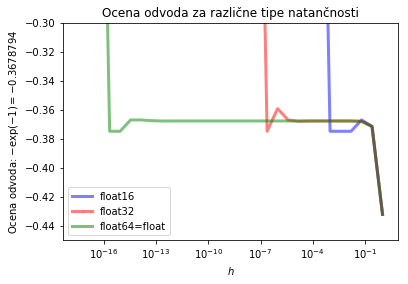

In [74]:
fig_ocena()

Definirajmo še sliko za relativno napako:

In [75]:
def fig_napaka():
    plt.semilogx(h, f1_16[1], 'b', lw=3, alpha=0.5, label='float16')
    plt.semilogx(h, f1_32[1], 'r', lw=3, alpha=0.5, label='float32')
    plt.semilogx(h, f1_64[1], 'g', lw=3, alpha=0.5, label='float64=float')
    plt.title('Relativna napaka za različne tipe natančnosti')
    plt.xlabel('$h$')
    plt.ylabel('Relativna napaka')
    plt.ylim(-.1, .1)
    plt.legend();

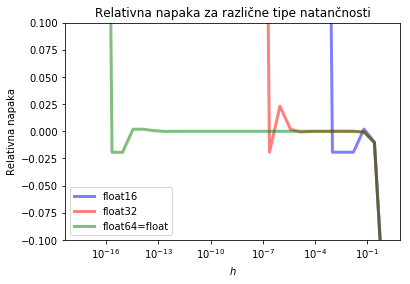

In [76]:
fig_napaka()

Opazimo, da vsi tipi najprej konvergirajo k pravi vrednosti ($\exp^{-1}=0.367879441171$), vendar pa potem z zmanjševanjem koraka ``float16`` zelo hitro divergira. Relativn napaka je pri tipu `float16` vedno relativno velika. Bistveno pozneje divergira ``float32`` in na koncu tudi ``float64``.

# Nekaj vprašanj za razmislek!

1. Za batni mehanizem na spodnji sliki strojno izpeljite kinematiko gibanja bata, če se kolenasta gred giblje po zakonu $\varphi(t)=\omega\,t$.
<img src='./fig/batni_mehanizem.png' width=300>
* Za kotno hitrosti $\omega=2\,\pi\,50\,$rad/s izrišite lego bata v treh obratih gredi. Uporabite: $r=0.03\,$m in $l=0.1\,$m.
* Simbolno odvajajte lego $x(t)$, da pridobite pospešek $\ddot x(t)$.
* Pripravite funkcijo za klicanje simbolnih izrazov za lego $x(t)$ in pospešek $\ddot x(t)$ iz ``numpy``
* S pomočjo ``scipy`` pripravite centralno diferenčno shemo za 2. odvod čez 3, 5, in 7 točk.
* Raziščite funkcijo ``numpy.convolve`` in z njo na podlagi numeričnih vrednosti za $x$ numerično izračunajte pospešek $\ddot x$. Kje je odvod pravilen?
* S centralno diferenčno shemo 2. odvoda čez tri točke ste izračunali notranje točke, nastavite diferenčno shemo naprej za izračun prve točke z natančnostjo $\mathcal{O}(h^{2})$.
* Dodajte podatkom lege, določeno mero šuma in preverite, zakaj ni primerna uporaba numeričnega odvajanja na šumnih podatkih.
* S centralno diferenčno shemo 2. odvoda čez tri točke ste doslej izračunali notranje točke, nastavite diferenčno shemo nazaj za izračun zadnje točke z natančnostjo $\mathcal{O}(h^{2})$.
* Raziščite vpliv časovnega koraka na izračun 2. odvoda.
* Izmerjene imamo sledeče pozicije (gibanja) avtomobila:

    $t = [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]$ [h]

    $s = [0, 3, 10, 13, 17, 25, 33, 46, 58, 75]$ [km]

    Izračunajte hitrost in pospešek avtomobila pri času 0,5 h. Hitrost in pospešek prikažite tudi v grafični obliki.
    
Opomba:
Dodatek k domačim nalogam: 6. vprašanje bi lahko nadaljevali in zašumljene podatke gladili ter nato izvedli odvajanje. Glajenje izvedite s konvolucijo med [0.21194156,  0.57611688,  0.21194156] in $x$.

# Dodatno

[Video predavanja na temo numeričnega odvajanja](https://www.youtube.com/watch?v=ZJkGI5DZQv8&list=PLYdroRCLMg5OvLx1EtY1ByvveJeTEXQd_&index=18)